In [1]:
import os
import pandas as pd
import numpy as np
from pybaseball import pitching_stats

In [2]:
START = 2002
END = 2023

In [4]:
pitching = pitching_stats(START, END, qual=50)

In [5]:
pitching = pitching[pitching['Season'] != 2020]

In [6]:
pitching.to_csv("pitching.csv")

In [7]:
pitching = pitching.groupby("IDfg", group_keys=False).filter(lambda x: x.shape[0] > 1)

In [8]:
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
753,60,2004,Randy Johnson,ARI,40,16,14,9.6,2.60,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1791,73,2002,Curt Schilling,ARI,35,23,7,9.3,3.23,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,1303,2011,Roy Halladay,PHI,34,19,6,8.7,2.35,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,1943,2009,Zack Greinke,KCR,25,16,8,8.7,2.16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,18282,2018,Jarlin Garcia,MIA,25,3,3,-1.3,4.91,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6790,1646,2010,Brian Tallet,TOR,32,2,6,-1.3,6.40,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6699,9388,2018,Josh Tomlin,CLE,33,2,5,-1.4,6.14,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6895,3245,2010,Ryan Rowland-Smith,SEA,27,1,10,-1.5,6.75,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def next_season(player):
    player = player.sort_values("Season")
    player["Next_WAR"] = player["WAR"].shift(-1)
    return player

pitching = pitching.groupby("IDfg", group_keys=False).apply(next_season)

In [10]:
null_count = pitching.isnull().sum()

In [11]:
null_count

IDfg            0
Season          0
Name            0
Team            0
Age             0
             ... 
Pitching+    5515
Stf+ FO      6383
Loc+ FO      6383
Pit+ FO      6383
Next_WAR     1297
Length: 394, dtype: int64

In [12]:
complete_cols = list(pitching.columns[null_count == 0])

In [13]:
pitching = pitching[complete_cols + ["Next_WAR"]].copy()

In [14]:
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
3424,3,2002,Kevin Appier,ANA,34,14,12,2.6,3.92,32,...,103,107,88,106,100,97,0,0.178,0.263,0.1
6137,3,2003,Kevin Appier,- - -,35,8,9,0.1,5.40,23,...,105,117,75,89,105,95,0,0.187,0.262,NaN
927,18,2010,Neftali Feliz,TEX,22,4,3,2.0,2.73,70,...,78,88,151,134,99,80,0,0.165,0.284,1.0
951,18,2011,Neftali Feliz,TEX,23,2,3,1.0,2.74,64,...,91,106,106,106,89,119,0,0.159,0.274,-0.1
2443,18,2016,Neftali Feliz,PIT,28,4,2,-0.1,3.52,62,...,92,78,142,102,88,118,135,0.117,0.259,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,27515,2022,Hirokazu Sawamura,BOS,34,1,1,0.0,3.73,49,...,120,83,91,100,86,125,154,0.143,0.254,NaN
5492,27552,2022,Graham Ashcraft,CIN,24,5,6,1.3,4.89,19,...,83,111,111,113,98,97,355,0.150,0.235,1.5
5278,27552,2023,Graham Ashcraft,CIN,25,7,9,1.5,4.76,26,...,86,120,96,106,103,92,451,0.166,0.262,NaN
1656,27779,2022,Bryce Elder,ATL,23,2,4,0.8,3.17,10,...,111,101,79,96,110,86,154,0.164,0.262,1.8


In [15]:
pitching.dtypes

IDfg          int64
Season        int64
Name         object
Team         object
Age           int64
             ...   
Hard%+        int64
Events        int64
CStr%       float64
CSW%        float64
Next_WAR    float64
Length: 130, dtype: object

In [16]:
pitching.dtypes[pitching.dtypes == "object"]

Name       object
Team       object
Dollars    object
Age Rng    object
dtype: object

In [17]:
del pitching["Dollars"]

In [18]:
del pitching["Age Rng"]

In [19]:
del pitching["Team"]

In [20]:
pitching

,IDfg,Season,Name,Age,W,L,WAR,ERA,G,GS,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
3424,3,2002,Kevin Appier,34,14,12,2.6,3.92,32,32,...,103,107,88,106,100,97,0,0.178,0.263,0.1
6137,3,2003,Kevin Appier,35,8,9,0.1,5.40,23,23,...,105,117,75,89,105,95,0,0.187,0.262,NaN
927,18,2010,Neftali Feliz,22,4,3,2.0,2.73,70,0,...,78,88,151,134,99,80,0,0.165,0.284,1.0
951,18,2011,Neftali Feliz,23,2,3,1.0,2.74,64,0,...,91,106,106,106,89,119,0,0.159,0.274,-0.1
2443,18,2016,Neftali Feliz,28,4,2,-0.1,3.52,62,0,...,92,78,142,102,88,118,135,0.117,0.259,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,27515,2022,Hirokazu Sawamura,34,1,1,0.0,3.73,49,0,...,120,83,91,100,86,125,154,0.143,0.254,NaN
5492,27552,2022,Graham Ashcraft,24,5,6,1.3,4.89,19,19,...,83,111,111,113,98,97,355,0.150,0.235,1.5
5278,27552,2023,Graham Ashcraft,25,7,9,1.5,4.76,26,26,...,86,120,96,106,103,92,451,0.166,0.262,NaN
1656,27779,2022,Bryce Elder,23,2,4,0.8,3.17,10,9,...,111,101,79,96,110,86,154,0.164,0.262,1.8


In [21]:
pitching_full = pitching.copy()
pitching_copy = pitching.copy() #we'll need this for 2024 predictions
pitching = pitching.dropna()

In [22]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

rr = Ridge(alpha=1)

split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr, n_features_to_select=20, direction="forward", cv=split, n_jobs=4)

In [23]:
removed_columns = ["Next_WAR", "Name", "IDfg", "Season", "GS"]
selected_columns = pitching.columns[~pitching.columns.isin(removed_columns)]

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
copy_scaler = MinMaxScaler() #added this for 2024 preds

pitching.loc[:, selected_columns] = scaler.fit_transform(pitching[selected_columns])
pitching_copy.loc[:, selected_columns] = copy_scaler.fit_transform(pitching_copy[selected_columns]) #added this for 2024 preds

In [25]:
pitching

,IDfg,Season,Name,Age,W,L,WAR,ERA,G,GS,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
3424,3,2002,Kevin Appier,0.535714,0.583333,0.571429,0.375000,0.415744,0.279070,32,...,0.54,0.621951,0.310078,0.398104,0.517857,0.477477,0.000000,0.487179,0.330357,0.1
927,18,2010,Neftali Feliz,0.107143,0.166667,0.142857,0.321429,0.269373,0.720930,0,...,0.29,0.390244,0.798450,0.530806,0.500000,0.324324,0.000000,0.403846,0.424107,1.0
951,18,2011,Neftali Feliz,0.142857,0.083333,0.142857,0.232143,0.270603,0.651163,0,...,0.42,0.609756,0.449612,0.398104,0.321429,0.675676,0.000000,0.365385,0.379464,-0.1
4192,20,2002,Al Levine,0.535714,0.166667,0.190476,0.107143,0.455105,0.511628,0,...,0.29,0.865854,0.465116,0.232227,0.535714,0.657658,0.000000,0.365385,0.241071,-0.3
1015,20,2003,Al Levine,0.571429,0.125000,0.285714,0.116071,0.276753,0.534884,0,...,0.53,0.426829,0.449612,0.511848,0.517857,0.324324,0.000000,0.307692,0.151786,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,27468,2022,Reid Detmers,0.107143,0.291667,0.285714,0.339286,0.397294,0.197674,25,...,0.45,0.573171,0.441860,0.393365,0.446429,0.540541,0.529155,0.365385,0.361607,2.5
843,27498,2022,Spencer Strider,0.142857,0.458333,0.238095,0.580357,0.261993,0.267442,20,...,0.28,0.695122,0.558140,0.407583,0.464286,0.504505,0.405248,0.346154,0.544643,5.5
1463,27515,2021,Hirokazu Sawamura,0.500000,0.208333,0.047619,0.125000,0.309963,0.546512,0,...,0.61,0.560976,0.255814,0.360190,0.642857,0.414414,0.201166,0.096154,0.383929,0.0
5492,27552,2022,Graham Ashcraft,0.178571,0.208333,0.285714,0.258929,0.535055,0.127907,19,...,0.34,0.670732,0.488372,0.431280,0.482143,0.477477,0.517493,0.307692,0.205357,1.5


In [26]:
pitching_copy

,IDfg,Season,Name,Age,W,L,WAR,ERA,G,GS,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
3424,3,2002,Kevin Appier,0.500000,0.583333,0.571429,0.375000,0.373894,0.279070,32,...,0.54,0.621951,0.340741,0.398104,0.517857,0.477477,0.000000,0.487179,0.318966,0.1
6137,3,2003,Kevin Appier,0.533333,0.333333,0.428571,0.151786,0.537611,0.174419,23,...,0.56,0.743902,0.244444,0.317536,0.607143,0.459459,0.000000,0.544872,0.314655,NaN
927,18,2010,Neftali Feliz,0.100000,0.166667,0.142857,0.321429,0.242257,0.720930,0,...,0.29,0.390244,0.807407,0.530806,0.500000,0.324324,0.000000,0.403846,0.409483,1.0
951,18,2011,Neftali Feliz,0.133333,0.083333,0.142857,0.232143,0.243363,0.651163,0,...,0.42,0.609756,0.474074,0.398104,0.321429,0.675676,0.000000,0.365385,0.366379,-0.1
2443,18,2016,Neftali Feliz,0.300000,0.166667,0.095238,0.133929,0.329646,0.627907,0,...,0.43,0.268293,0.740741,0.379147,0.303571,0.666667,0.193966,0.096154,0.301724,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,27515,2022,Hirokazu Sawamura,0.500000,0.041667,0.047619,0.142857,0.352876,0.476744,0,...,0.71,0.329268,0.362963,0.369668,0.267857,0.729730,0.221264,0.262821,0.280172,NaN
5492,27552,2022,Graham Ashcraft,0.166667,0.208333,0.285714,0.258929,0.481195,0.127907,19,...,0.34,0.670732,0.511111,0.431280,0.482143,0.477477,0.510057,0.307692,0.198276,1.5
5278,27552,2023,Graham Ashcraft,0.200000,0.291667,0.428571,0.276786,0.466814,0.209302,26,...,0.37,0.780488,0.400000,0.398104,0.571429,0.432432,0.647989,0.410256,0.314655,NaN
1656,27779,2022,Bryce Elder,0.133333,0.083333,0.190476,0.214286,0.290929,0.023256,9,...,0.62,0.548780,0.274074,0.350711,0.696429,0.378378,0.221264,0.397436,0.314655,1.8


In [27]:
sfs.fit(pitching[selected_columns], pitching["Next_WAR"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=20,
                          n_jobs=4)

In [28]:
predictors = list(selected_columns[sfs.get_support()])

In [29]:
predictors

['Age',
 'WAR',
 'G',
 'CG',
 'ShO',
 'WP',
 'SO',
 'IFFB',
 'BU',
 'IFFB%',
 'O-Contact%',
 'Zone%',
 'MD',
 'Oppo%',
 'Soft%',
 'K/9+',
 'GB%+',
 'HR/FB%+',
 'Soft%+',
 'Hard%+']

In [30]:
def backtest(data, model, predictors, start=9, step=1):
    all_predictions = []
    years = sorted(data["Season"].unique())

    for i in range(start, len(years), step):
        current_year = years[i]

        train = data[data["Season"] < current_year]
        test = data[data["Season"] == current_year]
    
        model.fit(train[predictors], train["Next_WAR"])
        preds = model.predict(test[predictors]) #returns a numpy array 
        preds = pd.Series(preds, index=test.index) #we do this to make it a series
        combined = pd.concat([test[["Season", "Next_WAR"]], preds.rename("predictions")], axis=1)
        combined["actual"] = combined["Next_WAR"]
        combined = combined.drop("Next_WAR", axis=1)
    
        all_predictions.append(combined)

    return pd.concat(all_predictions)

In [31]:
predictions = backtest(pitching, rr, predictors)

In [32]:
predictions

,Season,predictions,actual
951,2011,0.435268,-0.1
2643,2011,-0.477848,-0.4
4609,2011,0.887198,-0.2
3541,2011,0.959778,2.6
2685,2011,2.020602,1.4
...,...,...,...
404,2022,2.690723,-0.4
3087,2022,1.978502,2.5
843,2022,3.781693,5.5
5492,2022,1.531605,1.5


In [36]:
from pybaseball import playerid_lookup

#from a player's name we want to grab their unique ID and their scaled stats
def get_player_stats(player):
    f_name, l_name = player.split(" ")
    pl = playerid_lookup(l_name, f_name)
    pl_ID = int(pl["key_fangraphs"].iloc[0])
    pl_stats = pitching_copy[pitching_copy["IDfg"] == pl_ID]
    return pl_stats[["Season"] + predictors]

In [37]:
#need to grab the WAR from the correct unscaled dataframe
def get_WAR(player):
    f_name, l_name = player.split(" ")
    pl = playerid_lookup(l_name, f_name)
    pl_ID = int(pl["key_fangraphs"].iloc[0])
    pl_stats = pitching_full[pitching_full["IDfg"] == pl_ID]
    pl_WAR = pl_stats[["Season", "WAR"]]
    return pl_WAR

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_players_history(players_data, predicted_wars):
    plt.figure(figsize=(12, 8))

    palette = sns.color_palette("husl", len(players_data))

    # Plot past WAR for each player
    for i, (player_name, past_data) in enumerate(players_data.items()):
        past_war_color = palette[i]
        sns.lineplot(x='Season', y='WAR', data=past_data, marker='o', label=f'{player_name} - Past WAR', color=past_war_color)

        # Connect past WAR to predicted WAR
        max_season = past_data['Season'].max()
        predicted_war = predicted_wars[player_name]
        plt.plot([max_season, max_season + 1], [past_data['WAR'].iloc[-1], predicted_war], linestyle='dashed', color=past_war_color, label=f'{player_name} - Predicted WAR')

    plt.title('Players - Past and Predicted WAR Over Time')
    plt.xlabel('Season')
    plt.ylabel('WAR')
    plt.legend()
    plt.show()

In [44]:
def predicted_WAR(players):
    predictions_df = pd.DataFrame(columns=['Player', 'My Predictions'])
    players_data = {}
    for player in players:
        pl_stats = get_player_stats(player)
        pl_stats_last_season = pl_stats[pl_stats["Season"] == 2023]
        pl_stats_without_season = pl_stats_last_season.drop(["Season"], axis=1)
        pl_WAR_prediction = rr.predict(pl_stats_without_season).round(1)
        pl_df = pd.DataFrame({
        'Player': player,
        'My Predictions': pl_WAR_prediction
        })
        predictions_df = pd.concat([predictions_df, pl_df], ignore_index=True)
        player_data = get_WAR(player)
        players_data[player] = player_data
    plot_players_history(players_data, predictions_df.set_index('Player')['My Predictions'].to_dict())
    return predictions_df

/var/folders/v2/7xt43ywd7_z_984f2vfqglw00000gn/T/ipykernel_42110/2765161729.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, pl_df], ignore_index=True)


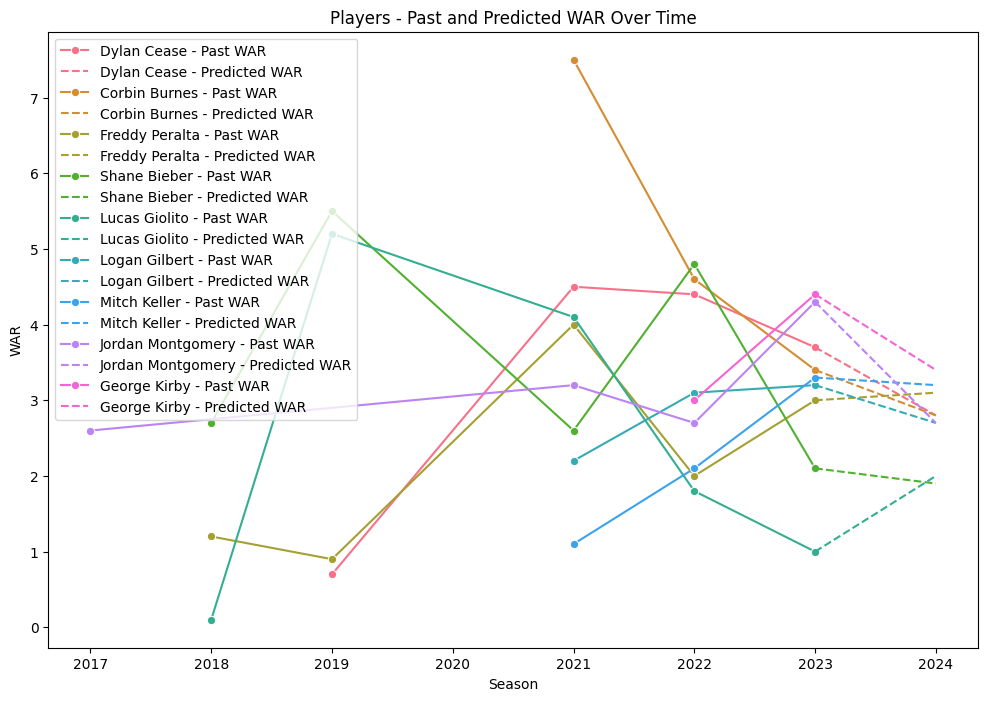

,Player,My Predictions,FGDC Predictions
0,Dylan Cease,2.8,2.7
1,Corbin Burnes,2.8,3.9
2,Freddy Peralta,3.1,3.3
3,Shane Bieber,1.9,2.9
4,Lucas Giolito,2.0,2.4
5,Logan Gilbert,2.7,2.8
6,Mitch Keller,3.2,2.8
7,Jordan Montgomery,2.7,3.2
8,George Kirby,3.4,3.6


In [45]:
players = ["Dylan Cease", "Corbin Burnes", "Freddy Peralta", "Shane Bieber", "Lucas Giolito", "Logan Gilbert", "Mitch Keller", "Jordan Montgomery", "George Kirby"]
fgdc_preds = [2.7, 3.9, 3.3, 2.9, 2.4, 2.8, 2.8, 3.2, 3.6]
fgdc_df = pd.DataFrame({
    'Player': players,
    'FGDC Predictions': fgdc_preds
})

my_preds_df = predicted_WAR(players)
combined_df = pd.merge(my_preds_df, fgdc_df, on='Player', how='inner')
combined_df